In [1]:
import numpy as np
from numpy import asarray
from numpy import savetxt
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"


In [2]:
df=pd.read_csv("data/20220621-0001_001.csv")

df=df.set_index('Time')
AES_phase = df[['Channel A']].to_numpy()
traces= df[['Channel B']].to_numpy()
for i in range(AES_phase.size):
    AES_phase[i]=float(AES_phase[i])
    traces[i]=float(traces[i])
    
attack_phase=[]
for i in range(AES_phase.size):
    if(float(AES_phase[i])>3):
        attack_phase.append(1.0)
    else:
        attack_phase.append(0.0)


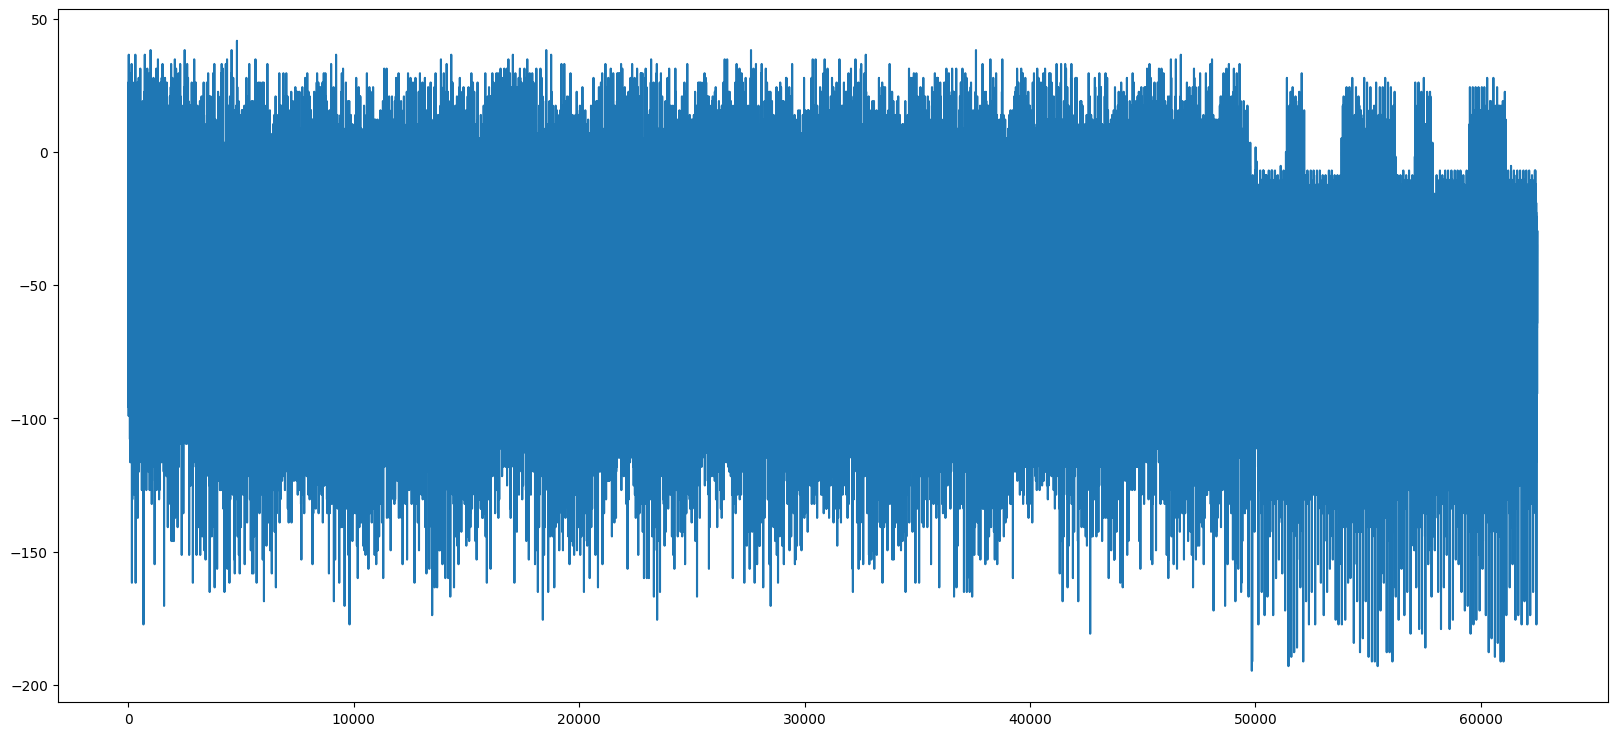

In [3]:
fig = plt.figure(figsize = (20, 9))
plt.plot(traces)

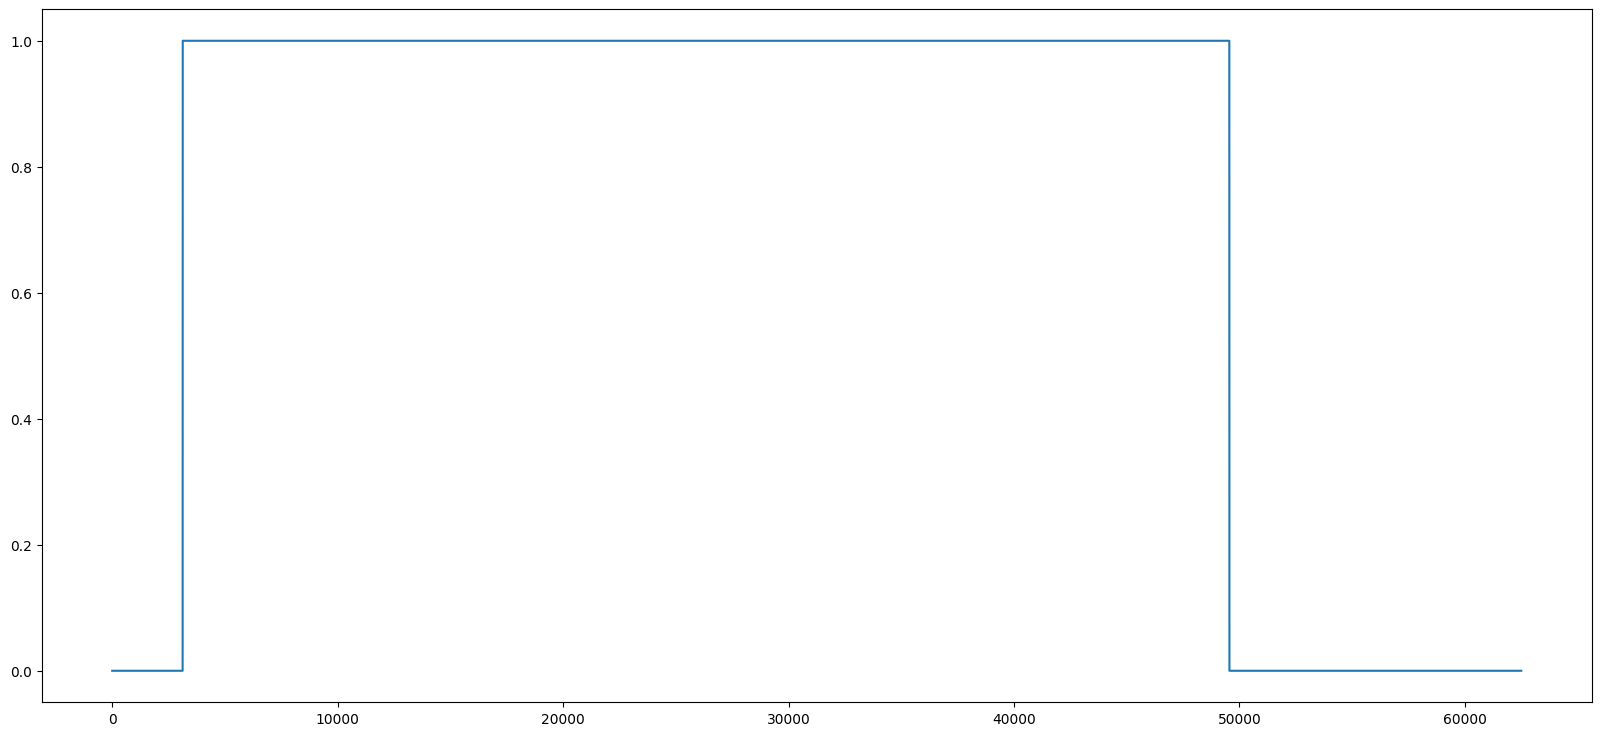

In [4]:
fig = plt.figure(figsize = (20, 9))
plt.plot(attack_phase)


In [5]:
#Filter Definition 
filter_size=500
Stride_size=10
Small_Stride_size=10

temp=[]
stride=[]
i=0
Flag=False
f2=False

while(True):
    if((i+filter_size)>len(attack_phase)):
        break
        
    Flag=False 
    f2==False
    t=[]
    
    for j in range(i,i+filter_size,1):
        t.append(float(traces[j]))
        if((int(attack_phase[j])==1) and (int(attack_phase[j-1])==0)):
            Flag=True
            f2=True
                
    temp.append(t)    
    if(Flag==True):
            #print(i)
            stride.append(1)
            i=i+Small_Stride_size
    else:
            stride.append(0)
            i=i+Stride_size

stride=np.array(stride)
traces=np.array(temp)    

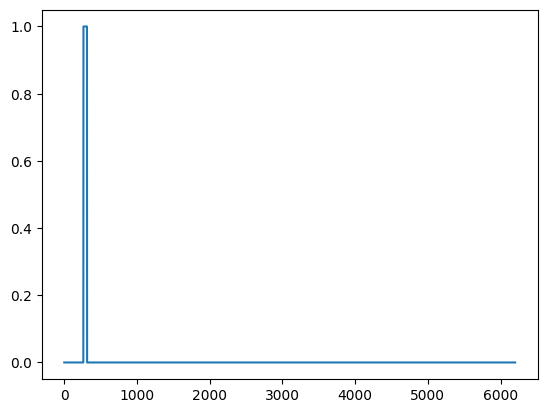

In [6]:
plt.plot(stride)

In [7]:
n1='temp/label_test_'+str(filter_size)+'_'+str(Stride_size)+'_'+str(Small_Stride_size)+'.csv'
n2='temp/traces_test_'+str(filter_size)+'_'+str(Stride_size)+'_'+str(Small_Stride_size)+'.csv'

stride.shape
savetxt(n1, stride, delimiter=',')
traces.shape
savetxt(n2, traces, delimiter=',')

In [8]:
pd.value_counts(np.array(stride))

0    6151
1      50
dtype: int64

In [9]:
# Block Testing.....

# Z=attack_phase
# plt.plot(Z)
# for i in range(np.size(Z)):
#     if(Z[i]==1):
#         break
# i        